<a href="https://colab.research.google.com/github/kushsengar/Machine-Learning/blob/main/Exploring_top_rated_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 1. Load dataset
df = pd.read_csv("movies.csv", engine='python', quotechar='"')   # update path if needed and handle parsing errors
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (6759, 15)
   Unnamed: 0  adult                     backdrop_path  \
0           0  False  /tsRy63Mu5cu8etL1X7ZLyf7UP1M.jpg   
1           1  False  /sYXLeu5usz6yEz0k00FYvtEdodD.jpg   
2           2  False  /kU98MbVVgi72wzceyrEbClZmMFe.jpg   
3           3  False  /cDe4PSDVxcKRRSsYQgoWVTK2bph.jpg   
4           4  False  /5yk3QwnQxzwKfhU1tlDkV2PSIBz.jpg   

                genre_ids      id origin_country original_language  \
0                [18, 80]    1396         ['US']                en   
1  [16, 10765, 18, 10759]   94605         ['US']                en   
2      [16, 10759, 10765]     246         ['US']                en   
3  [16, 10759, 18, 10765]  209867         ['JP']                ja   
4                    [18]  219246         ['KR']                ko   

                original_name  \
0                Breaking Bad   
1                      Arcane   
2  Avatar: The Last Airbender   
3                    葬送のフリーレン   
4                     폭싹 속았수다   

     

In [7]:
# 2. Top 10 Movies by Rating
top_movies = df.sort_values(by="vote_average", ascending=False).head(10)
print("\nTop 10 Movies:")
print(top_movies[["name", "vote_average", "first_air_date"]])


Top 10 Movies:
                               name  vote_average first_air_date
0                      Breaking Bad         8.922     2008-01-20
2253                   Breaking Bad         8.922     2008-01-20
4506                   Breaking Bad         8.922     2008-01-20
4508     Avatar: The Last Airbender         8.800     2005-02-21
2        Avatar: The Last Airbender         8.800     2005-02-21
2255     Avatar: The Last Airbender         8.800     2005-02-21
4507                         Arcane         8.763     2021-11-06
2254                         Arcane         8.763     2021-11-06
1                            Arcane         8.763     2021-11-06
3     Frieren: Beyond Journey's End         8.751     2023-09-29


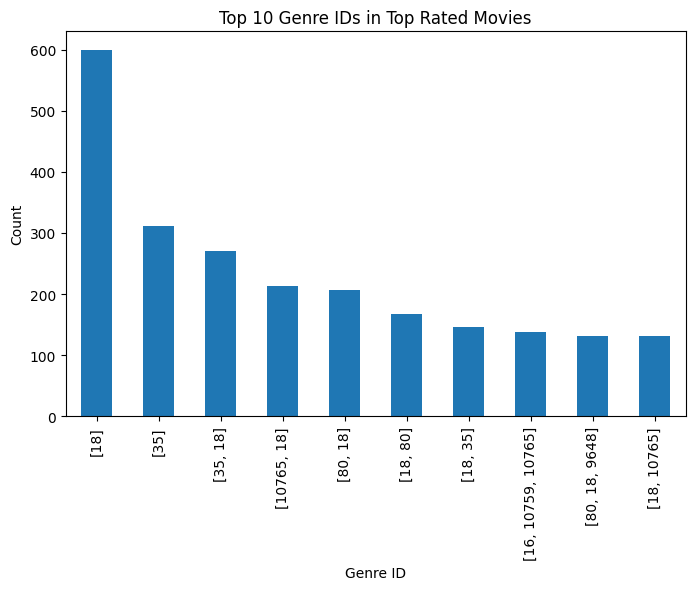

In [9]:
# 3. Most Common Genres
# Assuming 'genre_ids' column contains lists of genre IDs
df["genre_ids"] = df["genre_ids"].fillna("Unknown") # Filling missing values in genre_ids
all_genre_ids = df["genre_ids"].explode()
genre_counts = all_genre_ids.value_counts().head(10)

plt.figure(figsize=(8,5))
genre_counts.plot(kind="bar")
plt.title("Top 10 Genre IDs in Top Rated Movies") # Updated title to reflect genre IDs
plt.ylabel("Count")
plt.xlabel("Genre ID") # Updated label to reflect genre IDs
plt.show()

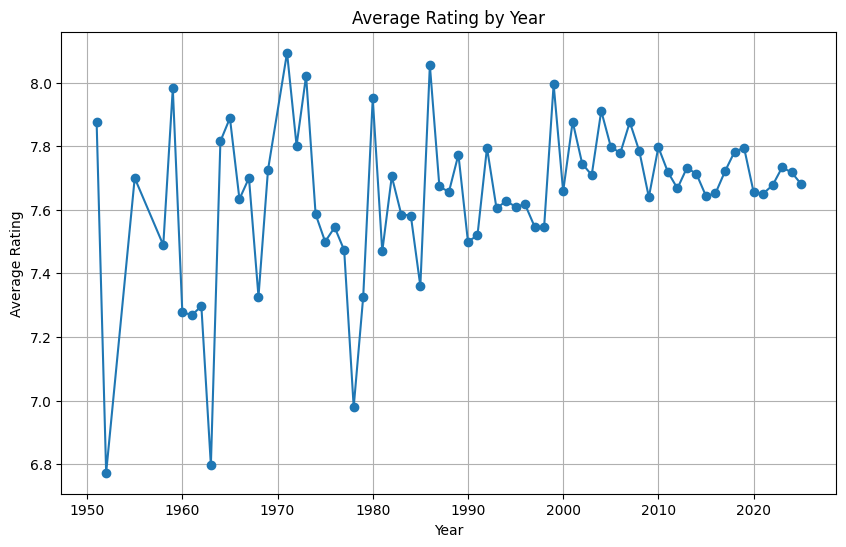

In [11]:
# 4. Average Rating by Year
df["first_air_date"] = pd.to_datetime(df["first_air_date"], errors="coerce")
df["year"] = df["first_air_date"].dt.year
ratings_by_year = df.groupby("year")["vote_average"].mean()

plt.figure(figsize=(10,6))
ratings_by_year.plot(kind="line", marker="o")
plt.title("Average Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()